# Whatsapp Chat Analysis

## To Do

- ~Get text File~ - Exported from Whatsapp into txt file
- ~Split the strings into rows~ - Using python to split the txt into a list of strings seemed better than diviing straight into pandas df. Error handling in df meant losing message data due to cutting off any long messages. 
- ~Split into columns~ Splitting the data in a df was easier than splitting initial list 
- ~Clean data~ NaN value caught me out here

- Analyse

## Time

- 13/09/2021 - 2 hrs
- 14/09/2021 - 1.5 hrs
- 15/09/2021 - 1 hr
- 17/09/2021 - 1.5 hrs
- 18/09/2021 - 6 hrs
- 19/09/2021 - 0.5 hrs
- 27/09/2021 - 1 hr
- 28/09/2021 - 3.5 hrs
- 29/09/2021 - 0.5 hrs
- 05/10/2021 - 0.75 hrs
- 05/12/2021 - 4 hrs
- 09/12/2021 - 1.5 hrs
- 10/12/2021 - 1 hr

In [1]:
import pandas as pd
import pandas_bokeh
pandas_bokeh.output_notebook()
from bokeh.plotting import figure, show
import matplotlib.pyplot as plt
import io

Loading BokehJS ...

## Sort and clean data

In [2]:
#Split text string into rows/list to read into data frame 

File = "/Users/grantmalone/Desktop/Data Science/Whatsapp Project/_chat.txt"

def read_file(File): #function to read txt file as list of strings 
    x = open(File, 'r', encoding = 'utf-8') #'r' opens as read, 'utf-8' to read funky characters etc 
    y = x.read() #big chunk of string right now
    content = y.splitlines() #converts chunk of string into list
    return content

chat = read_file(File)

In [3]:
df = pd.DataFrame({'Message':chat}) #couldn't split later using (chat, columns = 'Message'), column counts were wrong
df

Message
0       [12/01/2013, 11:26:42 am] ‎Mark created this g...
1               [12/01/2013, 11:26:42 am] ‎You were added
2       [05/10/2015, 12:54:59 pm] Grant: I've had an a...
3       [05/10/2015, 12:56:13 pm] Craig Reid: Things w...
4       [05/10/2015, 12:56:25 pm] Craig Reid: I know t...
...                                                   ...
209806  [12/09/2021, 11:53:25 am] Chris : He’s like ri...
209807  [12/09/2021, 11:53:28 am] Chris : And it’s a d...
209808  [12/09/2021, 11:56:07 am] Seb: There was one b...
209809  [12/09/2021, 11:57:08 am] Chris : Yeah there’s...
209810       [12/09/2021, 11:57:12 am] Chris : Canna mind

[209811 rows x 1 columns]

In [4]:
#Split Columns into useable data

df[['Date','Message']] = df['Message'].str.split(',', n=1, expand=True)
df[['Time','Message']] = df['Message'].str.split(']', n=1, expand=True)
df[['Name','Message']] = df['Message'].str.split(':', n=1, expand=True)
df

Message         Date  \
0                                                    None  [12/01/2013   
1                                                    None  [12/01/2013   
2        I've had an absolute shitemare this morning, ...  [05/10/2015   
3                                     Things will be ok g  [05/10/2015   
4        I know they're hard now and seems like the en...  [05/10/2015   
...                                                   ...          ...   
209806                   He’s like right beside the crowd  [12/09/2021   
209807                                   And it’s a drive  [12/09/2021   
209808   There was one boy shouts light the candle or ...  [12/09/2021   
209809   Yeah there’s heaps but there’s one that I’m t...  [12/09/2021   
209810                                         Canna mind  [12/09/2021   

                Time                       Name  
0        11:26:42 am   ‎Mark created this group  
1        11:26:42 am            ‎You were added  
2        12:54:59 pm                      Grant  
3        12:56:13 pm                 Craig Reid  
4        12:56:25 pm                 Craig Reid  
...              ...                        ...  
209806   11:53:25 am                     Chris   
209807   11:53:28 am                     Chris   
209808   11:56:07 am                        Seb  
209809   11:57:08 am                     Chris   
209810   11:57:12 am                     Chris   

[209811 rows x 4 columns]

In [27]:
#Save scrap data
#Could have the old group chat names in it

df_removeddata = df[df['Message'].isnull()]
a = df_removeddata['Name'].unique()
#a

#Everything in those rows are NaN - how to convert to string?

In [6]:
#Clean data 

#Took ages to drop the 'None' value because it wasn't actually a string value, it was NaN.

df = df[['Date', 'Time', 'Name', 'Message']]     #Swap columns round

df['Date'] = df['Date'].str.replace('[','') #Remove brackets in date


df['Name'] = df['Name'].replace([' \u202a+44\xa07891\xa0712420\u202c'],'Harris') #Replace Harris' old number
df = df.loc[df["Name"] != ' CLASS A 🍦 MENU'] #Drop Whatsapp server messages (Drop >3 words would be more robust)
df['Name'] = df['Name'].str.strip() #remove spaces beginning and end of names 

#df['Message'] = df['Message'].lower 

df.dropna(subset = ["Message"], inplace=True) #Drop NaN values

df['Message'] = df['Message'].str.lower()


#Dropping NaN values before cleaning 'Date' caused a SettingWithCopyWarning - Something to do with changing/not changing original df

df

Date          Time        Name  \
2       05/10/2015   12:54:59 pm       Grant   
3       05/10/2015   12:56:13 pm  Craig Reid   
4       05/10/2015   12:56:25 pm  Craig Reid   
5       05/10/2015   12:56:32 pm  Craig Reid   
6       05/10/2015   12:57:02 pm       Grant   
...            ...           ...         ...   
209806  12/09/2021   11:53:25 am       Chris   
209807  12/09/2021   11:53:28 am       Chris   
209808  12/09/2021   11:56:07 am         Seb   
209809  12/09/2021   11:57:08 am       Chris   
209810  12/09/2021   11:57:12 am       Chris   

                                                  Message  
2        i've had an absolute shitemare this morning, ...  
3                                     things will be ok g  
4        i know they're hard now and seems like the en...  
5                              but things will get better  
6        fs your names have changed colour as well i d...  
...                                                   ...  
209806                   he’s like right beside the crowd  
209807                                   and it’s a drive  
209808   there was one boy shouts light the candle or ...  
209809   yeah there’s heaps but there’s one that i’m t...  
209810                                         canna mind  

[208463 rows x 4 columns]

# Analysis 

## To Do 

- ~Who's sent the most messages~
    - Count names
    
- ~Message rate for each person graphed over time~
    - Per month, name count. graphed against time
    
- ~Who laughs the most~
    - Instances of 'ha' per person. Make laugh count column 
    
- ~Who swears the most, as swears per 100 words?~
    - Make swear column 

- ~Most active day (average)~

- ~Most active month (average)~

- ~Most active day ever~

- ~Most active year~

- ~List of chat names~


In [7]:
#Add required columns 

df['Laughs'] = df['Message'].str.count('haha|Haha|😂')
df['Swear'] = df['Message'].str.count('fuck|shit|bloody|bitch|bullshit|bastard|dick|cunt|motherfucker|fs')
df['Word Count'] = df['Message'].str.split().str.len()
df['Message_Count'] = 1

df

Date          Time        Name  \
2       05/10/2015   12:54:59 pm       Grant   
3       05/10/2015   12:56:13 pm  Craig Reid   
4       05/10/2015   12:56:25 pm  Craig Reid   
5       05/10/2015   12:56:32 pm  Craig Reid   
6       05/10/2015   12:57:02 pm       Grant   
...            ...           ...         ...   
209806  12/09/2021   11:53:25 am       Chris   
209807  12/09/2021   11:53:28 am       Chris   
209808  12/09/2021   11:56:07 am         Seb   
209809  12/09/2021   11:57:08 am       Chris   
209810  12/09/2021   11:57:12 am       Chris   

                                                  Message  Laughs  Swear  \
2        i've had an absolute shitemare this morning, ...       0      1   
3                                     things will be ok g       0      0   
4        i know they're hard now and seems like the en...       0      0   
5                              but things will get better       0      0   
6        fs your names have changed colour as well i d...       0      1   
...                                                   ...     ...    ...   
209806                   he’s like right beside the crowd       0      0   
209807                                   and it’s a drive       0      0   
209808   there was one boy shouts light the candle or ...       1      0   
209809   yeah there’s heaps but there’s one that i’m t...       0      0   
209810                                         canna mind       0      0   

        Word Count  Message_Count  
2               18              1  
3                5              1  
4               13              1  
5                5              1  
6               17              1  
...            ...            ...  
209806           6              1  
209807           4              1  
209808          11              1  
209809          10              1  
209810           2              1  

[208463 rows x 8 columns]

In [8]:
#Laugh rate calculation

totallaughs = df.groupby('Name')[['Laughs', 'Word Count']].agg('sum')
totallaughs['Laugh_Rate'] = totallaughs['Word Count']/totallaughs['Laughs']
totallaughs = totallaughs.sort_values('Laugh_Rate')
totallaughs = totallaughs.drop(['Laughs', 'Word Count'], axis = 1)
totallaughs


Laugh_Rate
Name                   
Joel          20.410448
Seb           21.248295
Luke          21.349714
Alex          22.329076
Blair         23.414146
Mark          23.692741
Lee           26.054468
Ren           28.410550
Craig McRae   29.608102
Grant         34.971096
Michael       38.767699
Chris         54.566989
Stuart        64.835821
Harris        65.185567
Craig Reid    79.792750

In [9]:
#Swear rate calculation

totalswears = df.groupby('Name')[['Swear', 'Word Count']].agg('sum')
totalswears['Swear_Rate'] = totalswears['Word Count']/totalswears['Swear']
totalswears = totalswears.sort_values('Swear_Rate')
totalswears = totalswears.drop(['Swear', 'Word Count'], axis = 1)
totalswears

Swear_Rate
Name                   
Luke          64.400784
Blair         72.836115
Craig McRae   84.142857
Michael       84.980601
Grant        102.097963
Harris       104.512397
Alex         108.017544
Mark         113.133477
Chris        119.281737
Ren          120.496109
Joel         127.209302
Lee          130.829060
Seb          157.323232
Craig Reid   170.466330
Stuart       222.769231

In [10]:
df["Date"] = pd.to_datetime(df["Date"], format = '%d/%m/%Y', errors = 'coerce') #convert date to datetime format

## Messages plotted over time

In [11]:
#Grouping data for time series analysis 

df["Month_Year"] = pd.to_datetime(df['Date']).dt.to_period('M') #Create new column with Month and year
Monthdata = df.groupby([(df["Month_Year"]),(df['Name'])])['Message_Count'].sum() #Group
time_group = pd.DataFrame(Monthdata).unstack(level=-1) #Pivot grouping table
time_group.columns = time_group.columns.droplevel() #Drop 'Message_Count'column
time_group

Name          Alex  Blair  Chris  Craig McRae  Craig Reid   Grant  Harris  \
Month_Year                                                                  
2015-10      646.0  131.0  295.0        182.0       248.0   548.0    37.0   
2015-11     1001.0  195.0  237.0        284.0        22.0   456.0    90.0   
2015-12     1587.0  338.0  246.0        384.0       336.0  1284.0   103.0   
2016-01     1101.0  305.0  115.0        271.0        18.0   688.0   225.0   
2016-02      859.0  134.0  376.0        241.0        30.0   632.0   139.0   
...            ...    ...    ...          ...         ...     ...     ...   
2021-05      174.0   29.0  366.0         82.0        92.0    73.0     NaN   
2021-06      406.0   29.0  788.0        316.0       156.0   206.0     NaN   
2021-07       45.0  142.0  514.0        141.0       180.0   175.0     NaN   
2021-08      357.0  129.0  258.0        181.0       183.0   109.0     NaN   
2021-09       23.0   34.0   78.0         22.0        18.0    18.0     NaN   

Name         Joel    Lee   Luke   Mark  Michael    Ren    Seb  Stuart  
Month_Year                                                             
2015-10      33.0  278.0  315.0  221.0    295.0  349.0  366.0    39.0  
2015-11       9.0  534.0  332.0  211.0    562.0  383.0  303.0    23.0  
2015-12      50.0  741.0  517.0  666.0    502.0  600.0  396.0    20.0  
2016-01       2.0  369.0  126.0  727.0    221.0  273.0  344.0     4.0  
2016-02      16.0  221.0  280.0  515.0    229.0  193.0  308.0    96.0  
...           ...    ...    ...    ...      ...    ...    ...     ...  
2021-05      20.0   63.0  126.0  251.0    290.0  302.0   67.0     8.0  
2021-06     192.0   62.0  449.0  230.0    759.0  333.0  266.0    44.0  
2021-07      24.0   82.0  108.0  299.0    216.0   75.0   70.0    18.0  
2021-08       6.0   83.0  128.0  241.0     82.0  160.0   42.0    16.0  
2021-09       1.0   20.0    6.0   31.0      NaN    6.0   30.0     1.0  

[65 rows x 15 columns]

Text(0, 0.5, 'Message Count')

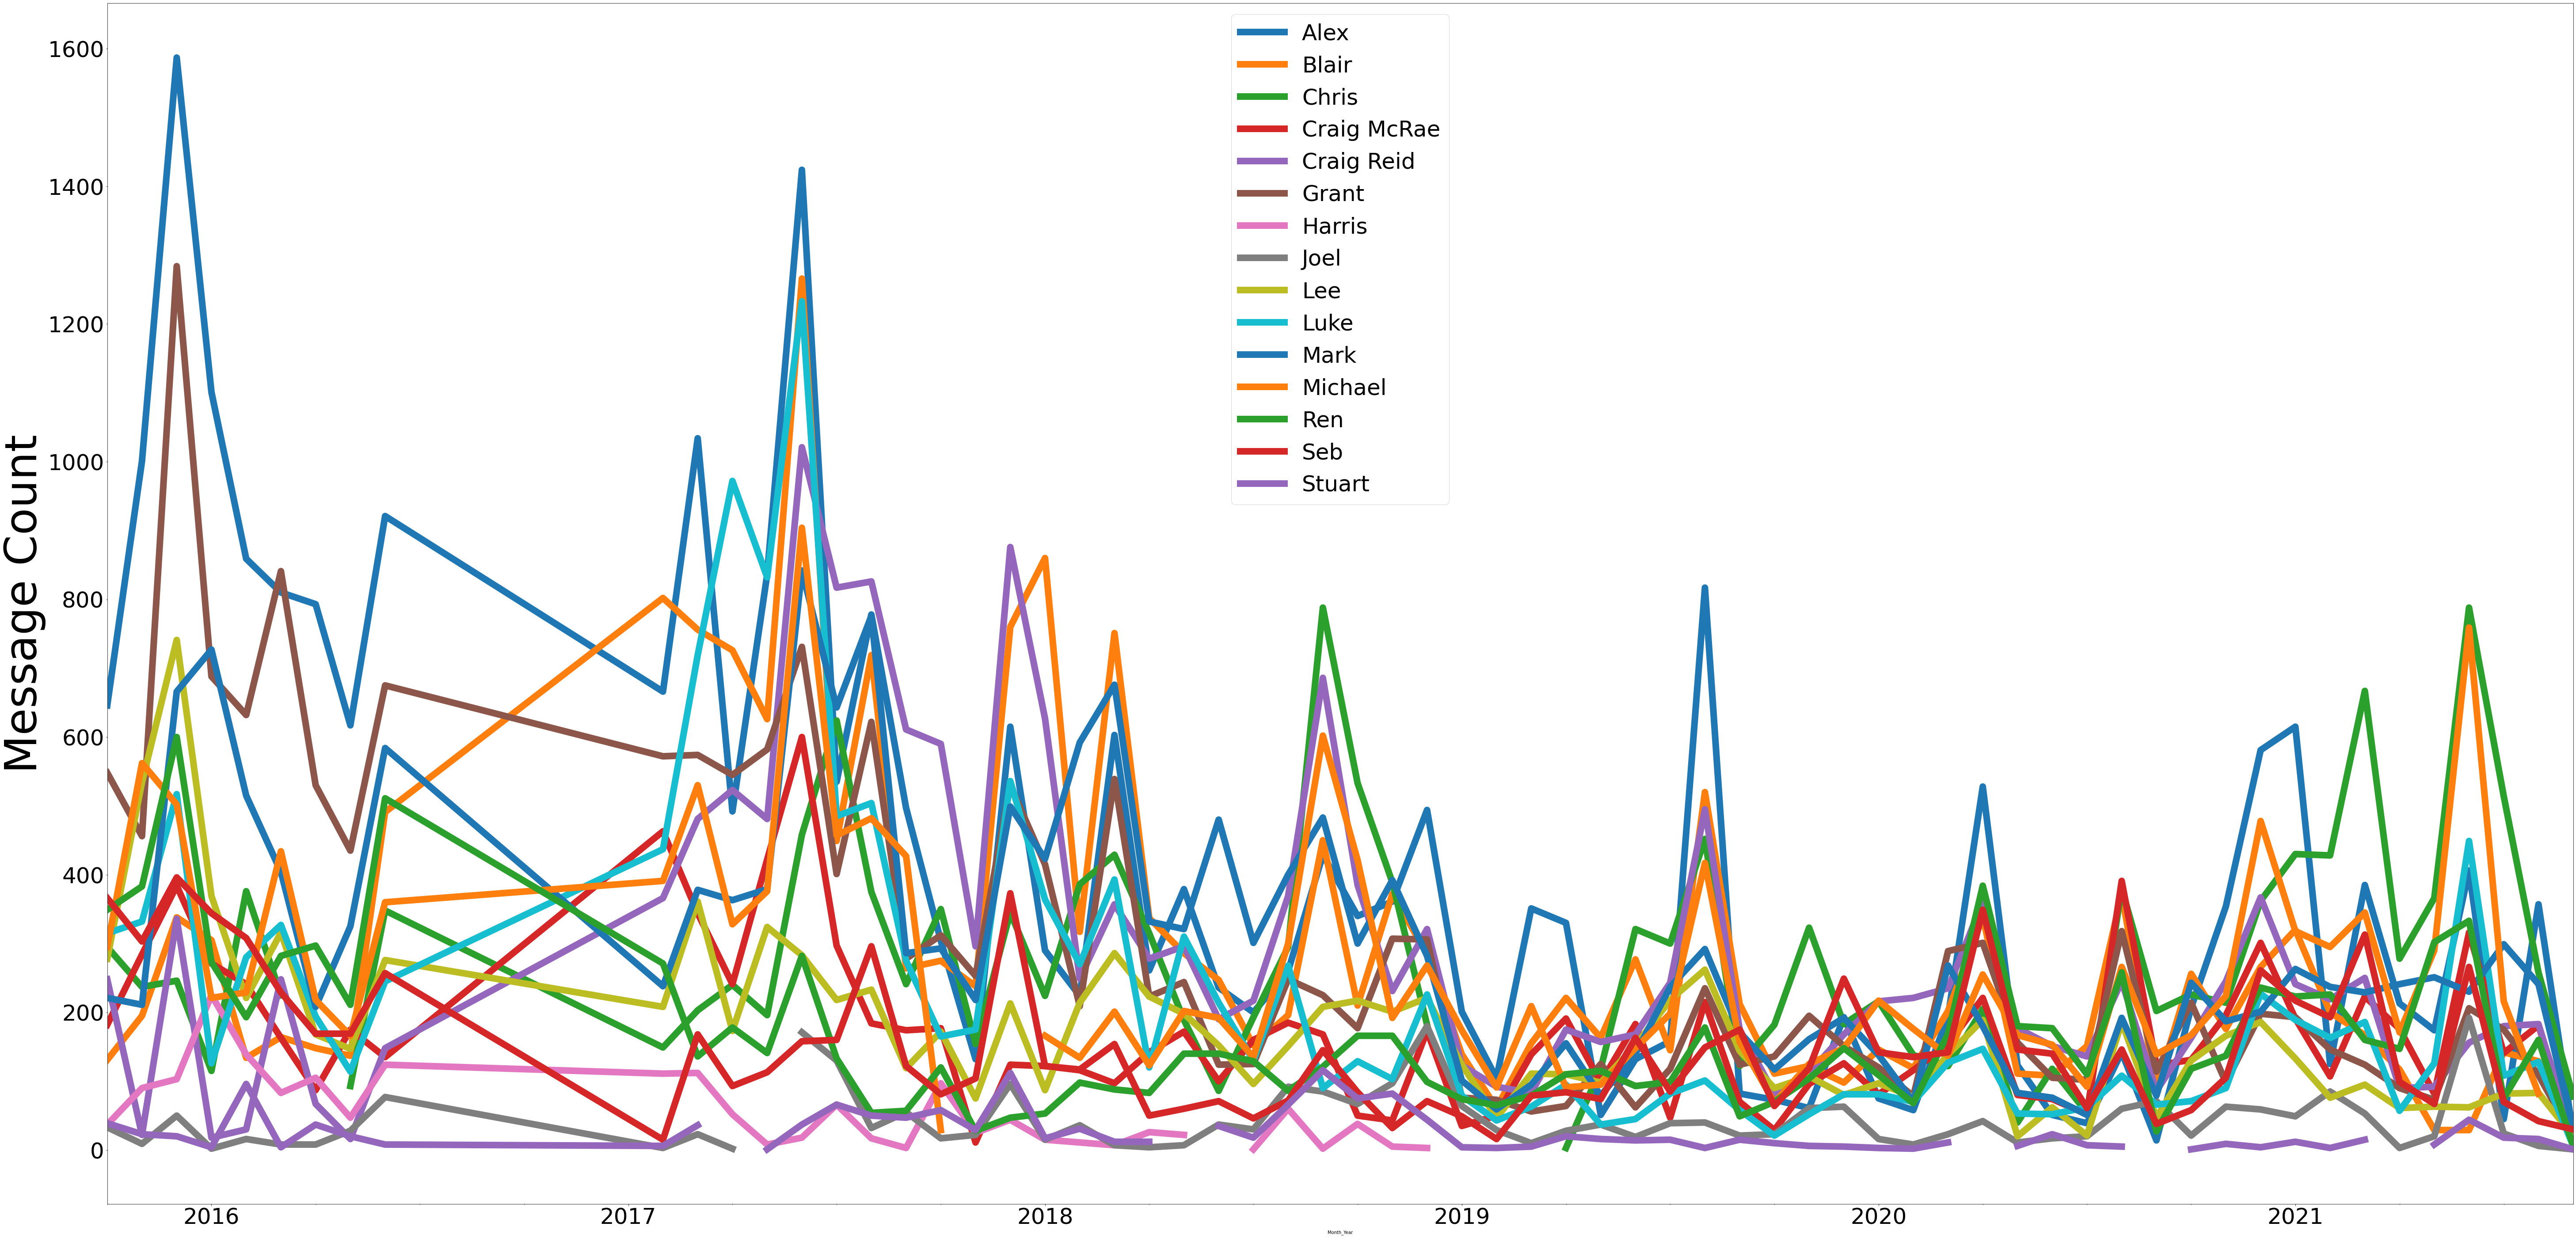

In [12]:
#Plot data for messages over time

FreqPlot = time_group.plot(figsize=(100,50), linewidth = 15, fontsize = 50)
FreqPlot.legend(loc=9, prop={'size': 50})
FreqPlot.set_ylabel('Message Count',fontdict={'fontsize':100})

#Graph's too messy to read so decided to do an average % increase/decrease to smooth it out

In [13]:
#Calculating mean for each person

time_group2 = pd.DataFrame(Monthdata).unstack(level=-1) #Data from before
time_group2 = pd.DataFrame(time_group2.mean()).unstack(level=-1) #Mean value for each person in same format as above table
time_group2.columns = time_group2.columns.droplevel() #Drop '0' level
time_group2

Name                 Alex       Blair       Chris  Craig McRae  Craig Reid  \
Message_Count  415.184615  294.046154  284.704918   171.153846  282.030769   

Name                Grant     Harris       Joel         Lee        Luke  \
Message_Count  296.507692  54.709677  42.453125  172.630769  226.507692   

Name                 Mark     Michael         Ren         Seb     Stuart  
Message_Count  297.646154  269.612903  164.676923  147.292308  25.083333

In [14]:
#Calculating mean for whole chat

In [15]:
#Adding to table and calculating % increase/decrease

time_group3 = pd.concat([time_group, time_group2]) #Add mean value to new table
time_group4 = ((time_group3.loc[:,'Alex':]-time_group3.iloc[-1]['Alex':]).div(time_group3.iloc[-1]['Alex':]))*100 #Calculate % Increase/Decrease from mean
time_group4.drop(time_group4.tail(1).index,inplace=True) #Drop calculation row
time_group4

Name           Alex      Blair       Chris  Craig McRae  Craig Reid  \
2015-10   55.593434 -55.449171    3.616053     6.337079  -12.066332   
2015-11  141.097565 -33.683880  -16.755916    65.932584  -92.199433   
2015-12  282.239597  14.947941  -13.594749   124.359551   19.135937   
2016-01  165.183236   3.725213  -59.607301    58.337079  -93.617718   
2016-02  106.895913 -54.428923   32.066563    40.808989  -89.362863   
...             ...        ...         ...          ...         ...   
2021-05  -58.090933 -90.137603   28.554154   -52.089888  -67.379446   
2021-06   -2.212176 -90.137603  176.777797    84.629213  -44.686886   
2021-07  -89.161448 -51.708261   80.537802   -17.617978  -36.177177   
2021-08  -14.014155 -56.129336   -9.379858     5.752809  -35.113463   
2021-09  -94.460296 -88.437189  -72.603213   -87.146067  -93.617718   

Name          Grant      Harris        Joel         Lee        Luke  \
2015-10   84.818139  -32.370283  -22.267206   61.037341   39.068125   
2015-11   53.790277   64.504717  -78.800147  209.330719   46.573389   
2015-12  333.041042   88.266509   17.776960  329.239818  128.248319   
2016-01  132.034452  311.261792  -95.288922  113.751003  -44.372750   
2016-02  113.147927  154.068396  -62.311373   28.018893   23.616111   
...             ...         ...         ...         ...         ...   
2021-05  -75.380065         NaN  -52.889216  -63.505926  -44.372750   
2021-06  -30.524568         NaN  352.263526  -64.085197   98.227263   
2021-07  -40.979609         NaN  -43.467059  -52.499777  -52.319500   
2021-08  -63.238728         NaN  -85.866765  -51.920506  -43.489778   
2021-09  -93.929331         NaN  -97.644461  -88.414580  -97.351083   

Name           Mark     Michael         Ren         Seb      Stuart  
2015-10  -25.750762    9.416128  111.930120  148.485482   55.481728  
2015-11  -29.110456  108.446997  132.576607  105.713390   -8.305648  
2015-12  123.755621   86.192869  264.349776  168.853144  -20.265781  
2016-01  144.249754  -18.030629   65.779148  133.549196  -84.053156  
2016-02   73.024241  -15.063412   17.199178  109.108001  282.724252  
...             ...         ...         ...         ...         ...  
2021-05  -15.671680    7.561618   83.389387  -54.512221  -68.106312  
2021-06  -22.727038  181.514716  102.214126   80.593273   75.415282  
2021-07    0.454851  -19.885140  -54.456278  -52.475454  -28.239203  
2021-08  -19.031374  -69.586025   -2.840060  -71.485273  -36.212625  
2021-09  -89.584949         NaN  -96.356502  -79.632338  -96.013289  

[65 rows x 15 columns]

Text(0, 0.5, '% Increase/Decrease From Average')

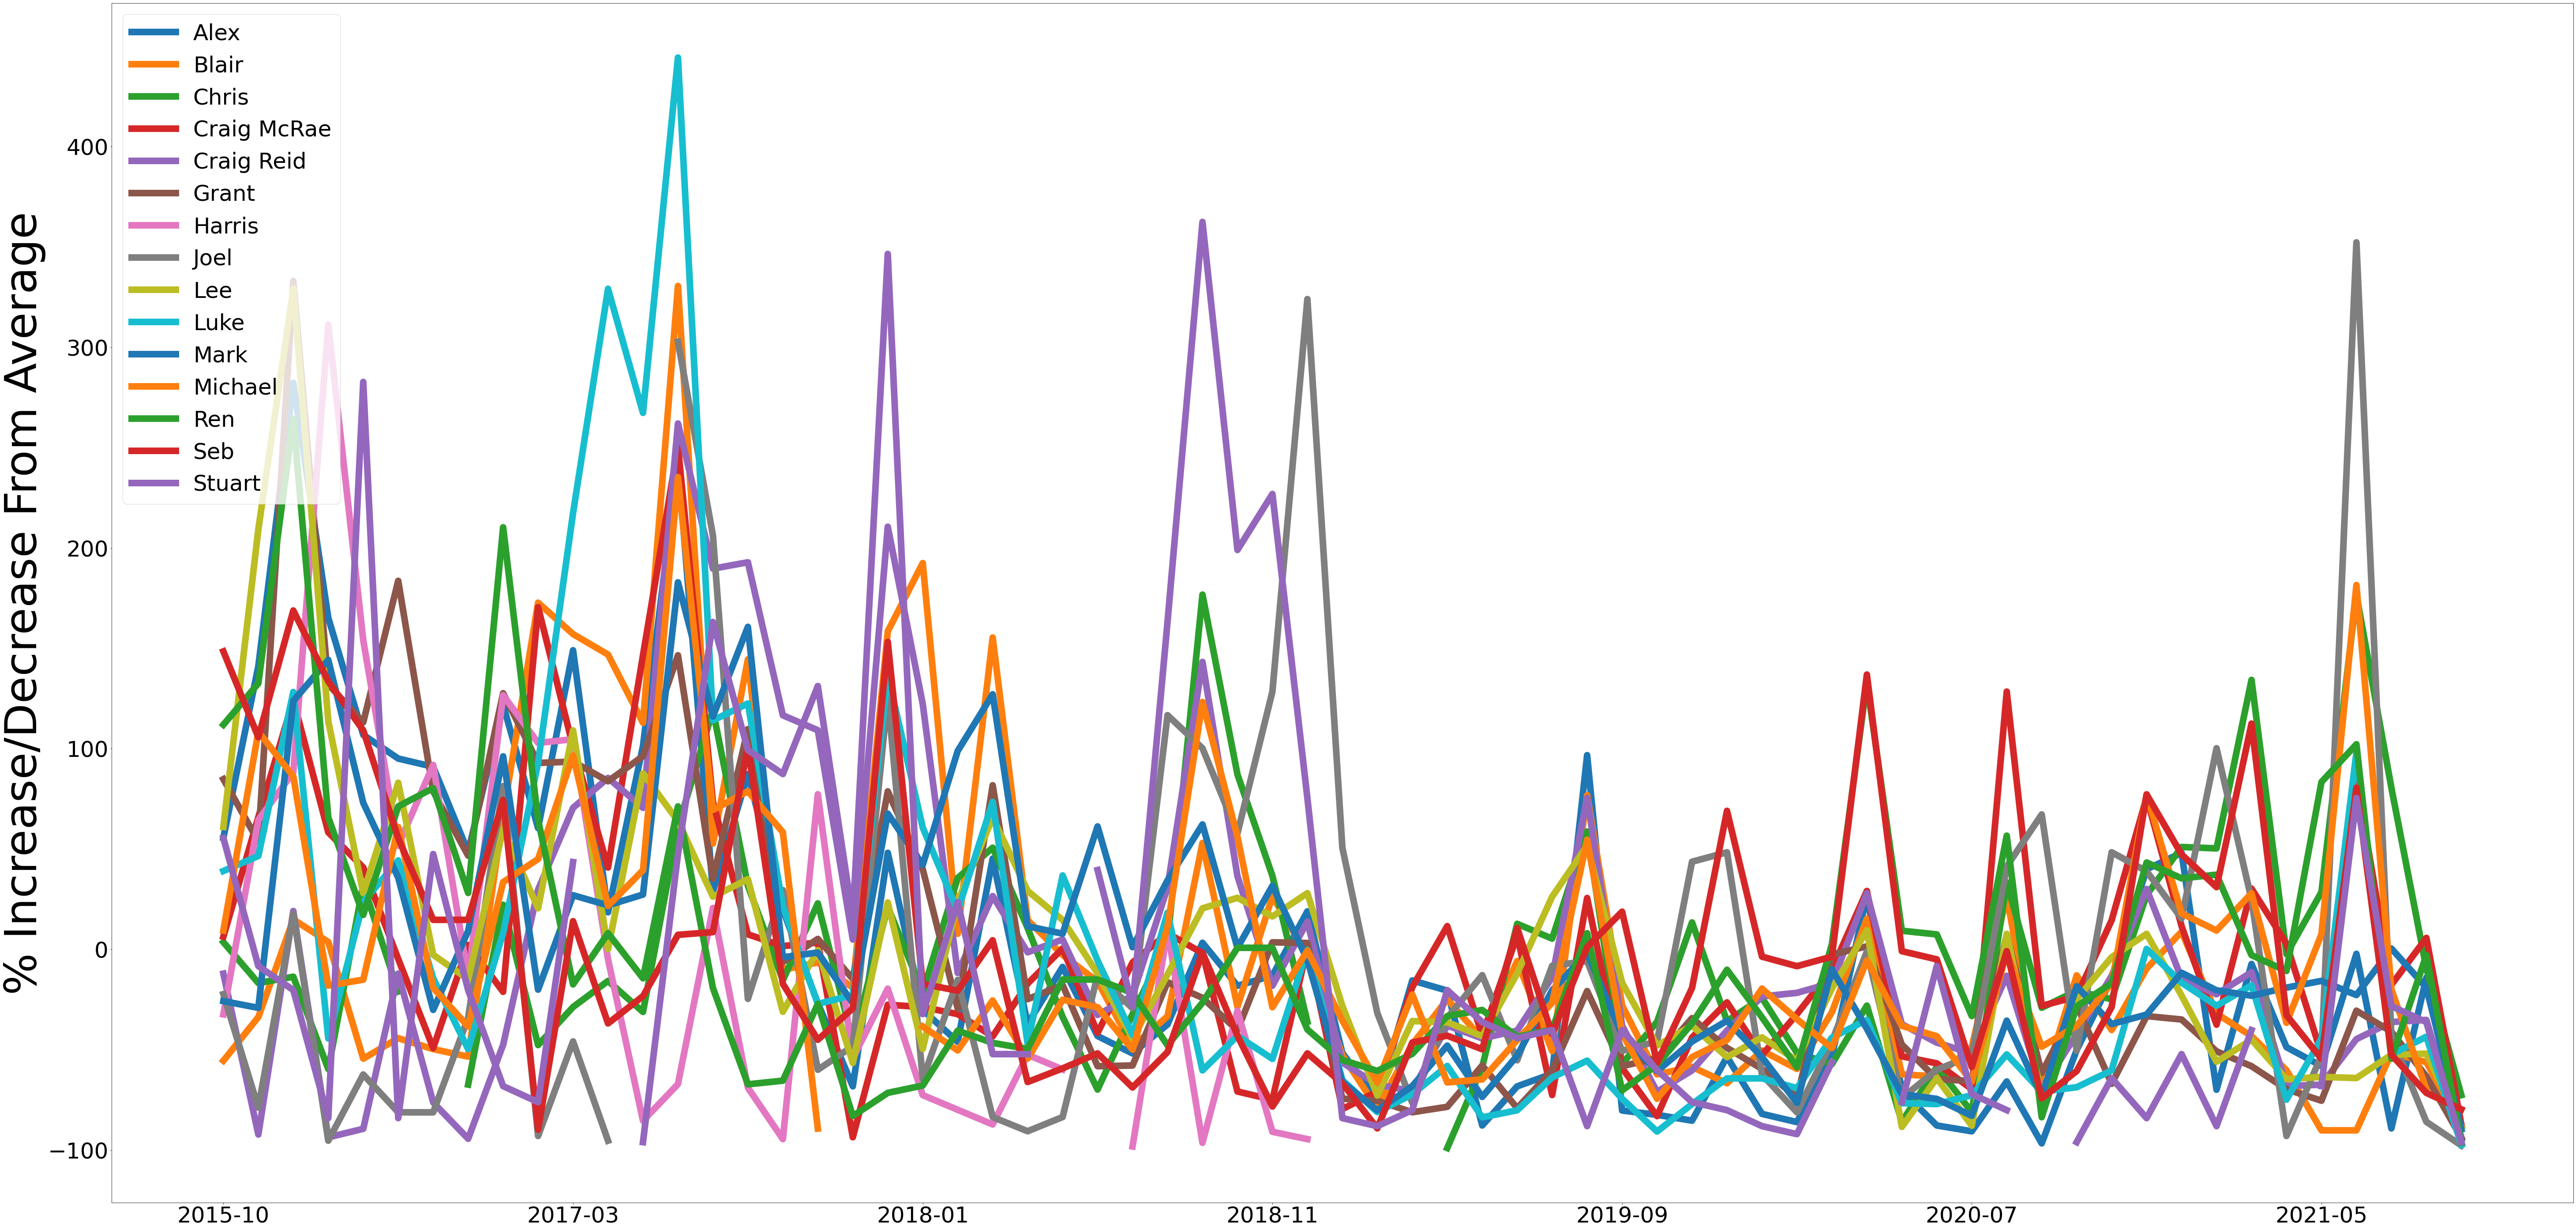

In [16]:
#Plot % increase/decrease from mean 

RatePlot = time_group4.plot(figsize=(100,50), linewidth = 15, fontsize = 50)
RatePlot.legend(loc=2, prop={'size': 50})
RatePlot.set_ylabel('% Increase/Decrease From Average',fontdict={'fontsize':100})

#Still too messy so decided to put it in an interactive graph

In [17]:
#Interactive graph

p = time_group4.plot_bokeh(kind='line',
                       title="% increase/decrease from mean",
                       xlabel='Date',
                       ylabel='% increase/decrease',
                       figsize=(950,500),
                       xticks=[3,7,11,15,19,23,27,31,35,39,43,47,51,55,59,63],
                       zooming=False)

#Open with Jupyter to use

## Most active day (average)

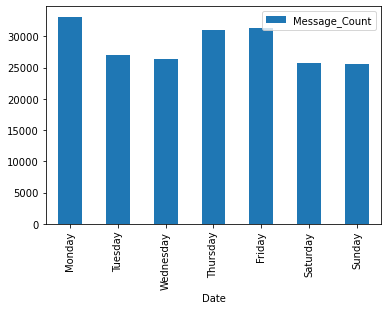

In [18]:
active_day = df.groupby(df['Date'].dt.weekday)[['Message_Count']].sum()
active_day = active_day.rename(index = {active_day.index[0]:'Monday', active_day.index[1]:'Tuesday', active_day.index[2]:'Wednesday', active_day.index[3]:'Thursday', active_day.index[4]:'Friday', active_day.index[5]:'Saturday', active_day.index[6]:'Sunday'})
active_day.plot.bar();

#message_plot = df.pivot(index="Date", columns="Name", values="Message_Count")

## Most active month (average)

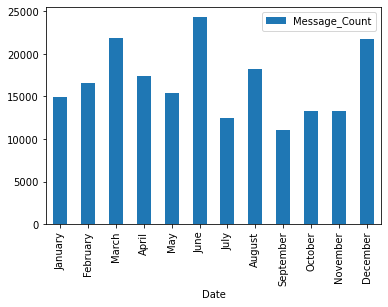

In [19]:
active_month = df.groupby([df['Date'].dt.month])[['Message_Count']].sum()
active_month = active_month.rename(index = {active_month.index[0]: 'January', active_month.index[1]: 'February', active_month.index[2]: 'March', active_month.index[3]: 'April', active_month.index[4]: 'May', active_month.index[5]: 'June', active_month.index[6]: 'July', active_month.index[7]: 'August', active_month.index[8]: 'September', active_month.index[9]: 'October', active_month.index[10]: 'November', active_month.index[11]: 'December'})
active_month.plot.bar();

## Most active day ever

In [20]:
date_group = df.groupby(['Date'])[['Name','Message_Count']].sum()
date_group.iloc[date_group['Message_Count'].argmax()]

#Blair went home with someone then smoked at the river, I had been at Kemp's, Mike went home with a northfield teacher, Chris roasted for chickenballs

Message_Count    952
Name: 2017-07-30 00:00:00, dtype: int64

## Plot messages over time

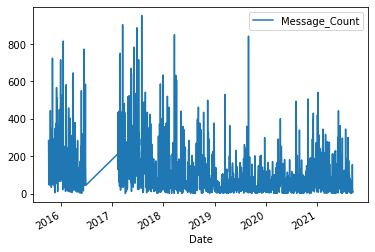

In [21]:
date_group.plot.line();

## The leaderboard

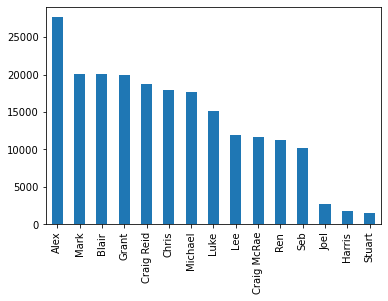

In [22]:
df_leaderboard = df['Name'].value_counts()
df_leaderboard.plot.bar();

## Group Titles

In [23]:
#Use removed data to find group titles

removed_data = df_removeddata['Name'].unique()
extra_df = pd.DataFrame(removed_data)
extra_df.columns = ['Data']
extra_df.dropna(subset = ['Data'], inplace=True) #Drop nan values
extra_df['Data'] = extra_df['Data'].astype('str') #Turn into string
extra_df

Data
0                             ‎Mark created this group
1                                      ‎You were added
3                                    ‎Alex removed Ren
4     ‎Craig McRae changed the subject to “The Deso...
5                                      ‎Alex added Ren
..                                                 ...
162   ‎Michael changed the subject to “Marks flight...
163                    ‎Luke changed this group's icon
164   ‎Chris  changed the subject to “Mark - make y...
165     ‎Chris  changed the subject to “Mark McFoster”
166      ‎Mark changed the subject to “CLASS A 🍦 MENU”

[166 rows x 1 columns]

In [24]:
titledata = extra_df[extra_df['Data'].str.contains("changed the subject to")] # Find Titles
titledata

Data
4     ‎Craig McRae changed the subject to “The Deso...
7     ‎Ren changed the subject to “Desolation of will”
8     ‎Ren changed the subject to “Desolation of gr...
9     ‎Michael changed the subject to “Desolation o...
15    ‎Ren changed the subject to “Desolation of Ramb”
..                                                 ...
161   ‎Craig Reid changed the subject to “Spikey Mi...
162   ‎Michael changed the subject to “Marks flight...
164   ‎Chris  changed the subject to “Mark - make y...
165     ‎Chris  changed the subject to “Mark McFoster”
166      ‎Mark changed the subject to “CLASS A 🍦 MENU”

[98 rows x 1 columns]

In [25]:
#Split and strip data
splittitle = titledata['Data'].str.split('to', n=1, expand=True)
splittitle.columns = ['Data','Title']
Title = splittitle.drop(['Data'], axis=1)
Title

Title
4       “The Desolation of Ren.”
7           “Desolation of will”
8          “Desolation of grubz”
9            “Desolation of ren”
15          “Desolation of Ramb”
..                           ...
161               “Spikey Mikey”
162      “Marks flight reminder”
164   “Mark - make your mind up”
165              “Mark McFoster”
166             “CLASS A 🍦 MENU”

[98 rows x 1 columns]